# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Puerto Ayora,-0.7393,-90.3518,23.64,94,75,1.79,EC,2023-10-03 23:32:02
1,1,Ta`ū,-14.2336,-169.5144,26.77,81,57,7.59,AS,2023-10-03 23:32:03
2,2,Pakxan,18.3778,103.6601,24.51,95,43,0.97,LA,2023-10-03 23:32:03
3,3,Dandeli,15.2667,74.6167,20.80,98,98,1.22,IN,2023-10-03 23:32:03
4,4,Kharkhorin,47.1975,102.8238,3.20,48,0,2.36,MN,2023-10-03 23:32:03


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

C:\Users\alexa\anaconda3\envs\dev\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\alexa\anaconda3\envs\dev\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\alexa\anaconda3\envs\dev\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


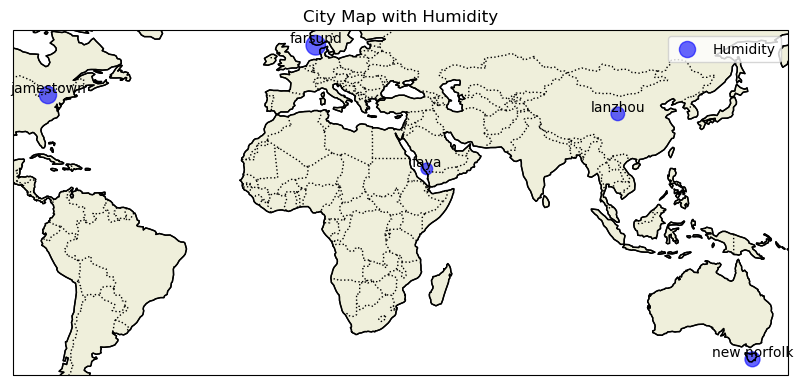

In [3]:

data = {
    'City': ['faya', 'farsund', 'new norfolk', 'jamestown', 'lanzhou'],
    'Lat': [18.3851, 58.0948, -42.7826, 42.0970, 36.0564], 
    'Lon': [42.4509, 6.8047, 147.0587, -79.2353, 103.7922],  
    'Humidity': [35, 100, 58, 77, 48]
}

# Create a map figure
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and country borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Create a scatter plot for cities
sc = ax.scatter(data['Lon'], data['Lat'], s=np.array(data['Humidity']) * 2, c='blue', alpha=0.6, edgecolors='blue', label='Humidity')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Map with Humidity')

# Add city labels
for i, city in enumerate(data['City']):
    plt.text(data['Lon'][i], data['Lat'][i], city, fontsize=10, ha='center', va='bottom')

# Add a legend
plt.legend([sc], ['Humidity'])

# Show the plot
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Define your ideal weather conditions (replace these values with your criteria)
ideal_conditions = {
    'Temp': 25,       
    'Humidity': 50,           
    'Cloudiness': 10,         
    'Wind Speed': 5         
}

# Filter the DataFrame to find cities that match your criteria
filtered_cities_df = city_data_df[
    (city_data_df['Temp'] <= ideal_conditions['Temp']) &
    (city_data_df['Humidity'] <= ideal_conditions['Humidity']) &
    (city_data_df['Cloudiness'] <= ideal_conditions['Cloudiness']) &
    (city_data_df['Wind Speed'] <= ideal_conditions['Wind Speed'])
]

# Drop any rows with null values
filtered_cities_df = filtered_cities_df.dropna()

# Display sample data (you can adjust the number of rows as needed)
filtered_cities_df.sample(10)  

,City_ID,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
128,128,Crawfordsville,40.0411,-86.8745,24.65,41,0,1.54,US,2023-10-03 23:31:20
534,534,Zabul Province,32.2500,67.2500,13.50,23,0,1.86,AF,2023-10-03 23:32:59
85,85,Phalia,32.4297,73.5775,22.28,33,0,1.86,PK,2023-10-03 23:32:12
291,291,Beāwar,26.1000,74.3167,22.48,47,3,4.08,IN,2023-10-03 23:32:34
235,235,Bo`ka,40.8108,69.1986,15.27,26,6,2.01,UZ,2023-10-03 23:32:28
589,589,Jaipur,26.9167,75.8167,23.62,50,0,1.03,IN,2023-10-03 23:33:05
217,217,Colac,-38.3333,143.5833,11.02,49,10,3.24,AU,2023-10-03 23:32:26
4,4,Kharkhorin,47.1975,102.8238,3.20,48,0,2.36,MN,2023-10-03 23:32:03
290,290,Schweizer-Reneke,-27.1887,25.3293,17.46,39,1,4.07,ZA,2023-10-03 23:32:34
424,424,Masterton,-40.9597,175.6575,11.60,45,2,2.08,NZ,2023-10-03 23:32:48


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE
hotel_df = filtered_cities_df.copy()
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE
hotel_df['Hotel Name'] = ''
# Display sample data
# YOUR CODE HERE
hotel_df.sample(10) 

,City_ID,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
397,397,Meadow Lakes,61.6247,-149.6011,7.00,49,0,2.06,US,2023-10-03 23:32:45,
442,442,Rewāri,28.1833,76.6167,23.87,26,0,1.81,IN,2023-10-03 23:32:50,
204,204,Tanaina,61.6269,-149.4281,6.72,50,0,2.06,US,2023-10-03 23:32:25,
488,488,Nahrin,36.0649,69.1334,16.91,25,0,2.94,AF,2023-10-03 23:32:54,
128,128,Crawfordsville,40.0411,-86.8745,24.65,41,0,1.54,US,2023-10-03 23:31:20,
235,235,Bo`ka,40.8108,69.1986,15.27,26,6,2.01,UZ,2023-10-03 23:32:28,
589,589,Jaipur,26.9167,75.8167,23.62,50,0,1.03,IN,2023-10-03 23:33:05,
291,291,Beāwar,26.1000,74.3167,22.48,47,3,4.08,IN,2023-10-03 23:32:34,
290,290,Schweizer-Reneke,-27.1887,25.3293,17.46,39,1,4.07,ZA,2023-10-03 23:32:34,
85,85,Phalia,32.4297,73.5775,22.28,33,0,1.86,PK,2023-10-03 23:32:12,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 100000

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = row['Lat']
    longitude = row['Lon']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params = {
        'Lat': latitude,
        'Lon': longitude,
        'categories': 'hotel',
        'radius': radius,
        'apiKey': geoapify_key
    }
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    response = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
Kharkhorin - nearest hotel: No hotel found
Phalia - nearest hotel: No hotel found
Crawfordsville - nearest hotel: No hotel found
Tanaina - nearest hotel: No hotel found
Colac - nearest hotel: No hotel found
Bo`ka - nearest hotel: No hotel found
Schweizer-Reneke - nearest hotel: No hotel found
Beāwar - nearest hotel: No hotel found
Meadow Lakes - nearest hotel: No hotel found
Gaimán - nearest hotel: No hotel found
Masterton - nearest hotel: No hotel found
Rewāri - nearest hotel: No hotel found
Nahrin - nearest hotel: No hotel found
Zabul Province - nearest hotel: No hotel found
Jaipur - nearest hotel: No hotel found


,City_ID,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
4,4,Kharkhorin,47.1975,102.8238,3.20,48,0,2.36,MN,2023-10-03 23:32:03,No hotel found
85,85,Phalia,32.4297,73.5775,22.28,33,0,1.86,PK,2023-10-03 23:32:12,No hotel found
128,128,Crawfordsville,40.0411,-86.8745,24.65,41,0,1.54,US,2023-10-03 23:31:20,No hotel found
204,204,Tanaina,61.6269,-149.4281,6.72,50,0,2.06,US,2023-10-03 23:32:25,No hotel found
217,217,Colac,-38.3333,143.5833,11.02,49,10,3.24,AU,2023-10-03 23:32:26,No hotel found
235,235,Bo`ka,40.8108,69.1986,15.27,26,6,2.01,UZ,2023-10-03 23:32:28,No hotel found
290,290,Schweizer-Reneke,-27.1887,25.3293,17.46,39,1,4.07,ZA,2023-10-03 23:32:34,No hotel found
291,291,Beāwar,26.1000,74.3167,22.48,47,3,4.08,IN,2023-10-03 23:32:34,No hotel found
397,397,Meadow Lakes,61.6247,-149.6011,7.00,49,0,2.06,US,2023-10-03 23:32:45,No hotel found
407,407,Gaimán,-43.2897,-65.4929,11.85,43,2,3.75,AR,2023-10-03 23:32:46,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

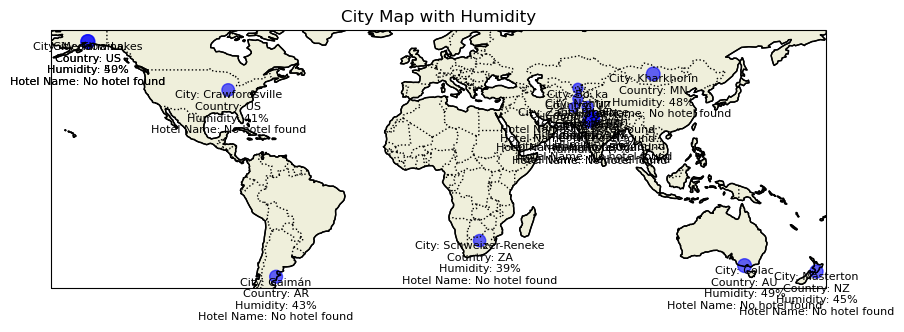

In [7]:
# Create a map figure
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and country borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Create a scatter plot for cities with labels
sc = ax.scatter(hotel_df['Lon'], hotel_df['Lat'], s=np.array(hotel_df['Humidity']) * 2, c='blue', alpha=0.6, edgecolors='blue')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Map with Humidity')

# Add city labels with information as text annotations
for i, row in hotel_df.iterrows():
    city_info = f"City: {row['City']}\nCountry: {row['Country']}\nHumidity: {row['Humidity']}%\nHotel Name: {row['Hotel Name']}"
    plt.text(row['Lon'], row['Lat'], city_info, fontsize=8, ha='center', va='top')

# Show the plot
plt.show()